 **Técnicas de Procesamiento del Habla**

# RECONOCIMIENTO DE EMOCIONES EN TEXTO

Para este proyecto vamos a realizar un modelo para el reconocimiento de emociones en texto escrito.

El dataset seleccionado es: *emotion analysis based on text* fue conseguido en Kaggle.

El dataset cuenta con 839555 entradas y dos columnas

1. text: contiene partes dde oraciones extraidas de texto de tweets.
2. Emotion: contiene la emoción representada en el texto. Las emociones posibles son:
    * Neutral → neutral
    * Love → amor
    * happiness → felicidad
    * sadness → tristeza
    * relief → alivio
    * hate → odio
    * anger → enojo
    * fun → diversión
    * enthusiasm → entusiasmo
    * surprise → sorpresa
    * empty → vacío
    * worry → preocupación
    * boredom → aburrimiento



### Leemos el dataset y hacemos un primer acercamiento a los datos

In [26]:
import pandas as pd

df = pd.read_csv('emotion_sentimen_dataset.csv')
df.head()

,Unnamed: 0,text,Emotion
0,0,i seriously hate one subject to death but now ...,hate
1,1,im so full of life i feel appalled,neutral
2,2,i sit here to write i start to dig out my feel...,neutral
3,3,ive been really angry with r and i feel like a...,anger
4,4,i feel suspicious if there is no one outside l...,neutral


In [2]:
df.columns

Index(['Unnamed: 0', 'text', 'Emotion'], dtype='object')

In [27]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [33]:
df.isnull().any()

text       False
Emotion    False
dtype: bool

In [31]:
df = df.dropna(subset=['Emotion'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474892 entries, 0 to 474891
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     474892 non-null  object
 1   Emotion  474892 non-null  object
dtypes: object(2)
memory usage: 10.9+ MB


In [34]:
df.describe()

,text,Emotion
count,474892,474892
unique,393822,13
top,i feel more adventurous willing to take risks ...,neutral
freq,18,381670


In [35]:
df['Emotion'].value_counts()

Emotion
neutral       381670
love           22243
happiness      15441
sadness         9818
relief          9439
hate            8637
anger           7015
fun             5649
enthusiasm      5248
surprise        3949
empty           3136
worry           2575
boredom           72
Name: count, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

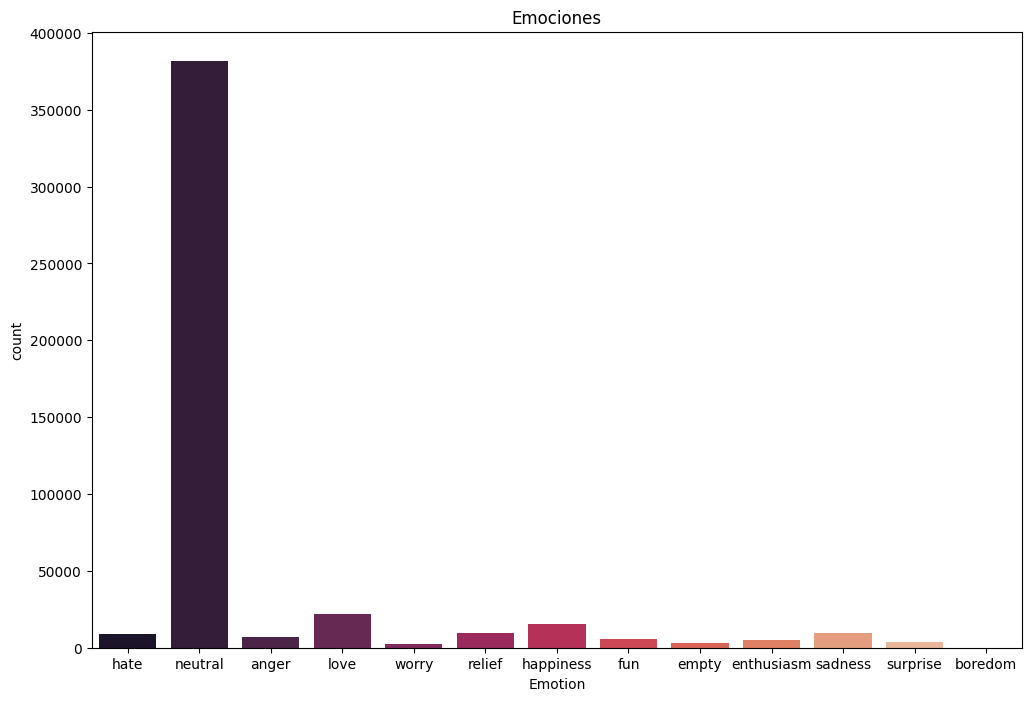

In [36]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Emotion', data=df,hue='Emotion', palette='rocket', legend=False)
plt.title('Emociones')
plt.show()

Podemos ver que hay un gran desbalanceo en los datos, especialmente con la clase neutral. Como paso siguiente vamos a submuestrar la clase.

## Preprocesamiento de los datos

#### Submuestreo para balancear la clase neutral.

In [37]:
import pandas as pd
from sklearn.utils import resample


# Cargar los datos
data = df

# Separar las clases dominantes y minoritarias
majority_class = data[data.Emotion == 'neutral']
minority_classes = data[data.Emotion != 'neutral']

# Submuestrear la clase mayoritaria
majority_class_downsampled = resample(majority_class,
                                      replace=False,
                                      n_samples=10000,  # Número de muestras deseado para la clase mayoritaria
                                      random_state=42)

# Combinar las clases minoritarias y la clase mayoritaria submuestreada
balanced_data = pd.concat([minority_classes, majority_class_downsampled])


In [38]:
balanced_data['Emotion'].value_counts()

Emotion
love          22243
happiness     15441
neutral       10000
sadness        9818
relief         9439
hate           8637
anger          7015
fun            5649
enthusiasm     5248
surprise       3949
empty          3136
worry          2575
boredom          72
Name: count, dtype: int64

In [39]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103222 entries, 0 to 374371
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     103222 non-null  object
 1   Emotion  103222 non-null  object
dtypes: object(2)
memory usage: 2.4+ MB


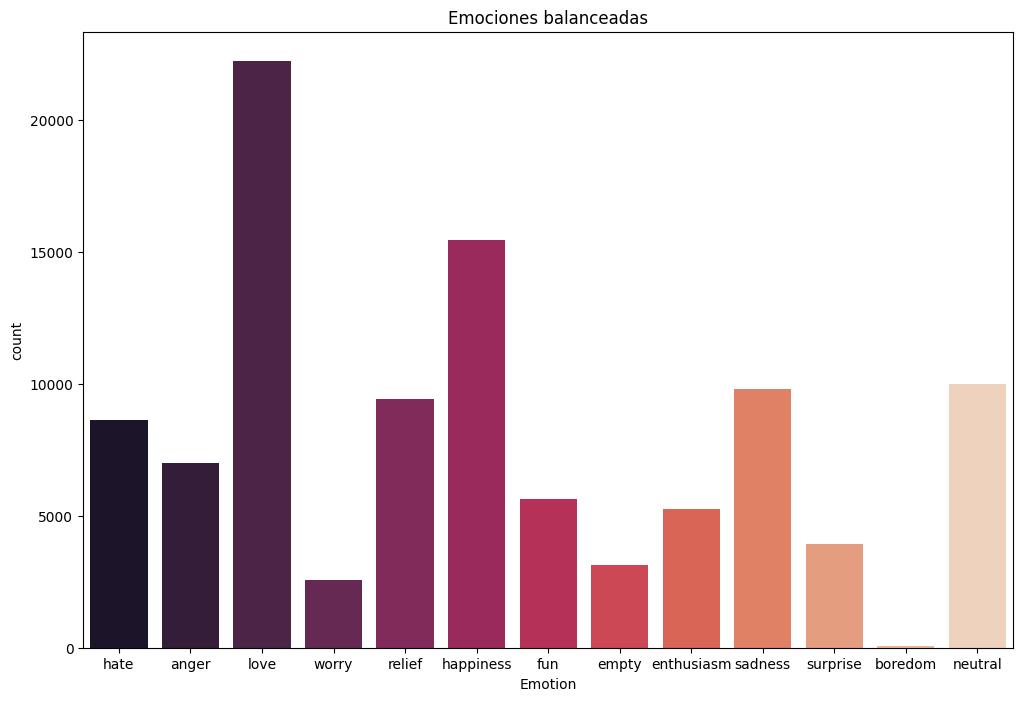

In [40]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Emotion', data=balanced_data,hue='Emotion', palette='rocket', legend=False)
plt.title('Emociones balanceadas')
plt.show()

### Vamos a utilizar neattext para eliminar stopwords.

→ Estas palabras no aportan mucho significado en la tarea de análisis y, por lo tanto, se excluyen para reducir el ruido y mejorar la eficiencia del procesamiento.

In [14]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.4 MB/s eta 0:00:00


In [41]:
import neattext.functions as nfx

# Eliminar stopwords
balanced_data['Clean_Text'] = balanced_data['text'].apply(nfx.remove_stopwords)

balanced_data.sample(15)



,text,Emotion,Clean_Text
117558,i was being robbed of my right to choose what ...,sadness,robbed right choose feel fake feeling redeemin...
2874,i don t know what it feels like to be in love ...,love,know feels like love starting scared actually ...
298920,i just remember being so fully stressed out an...,fun,remember fully stressed fun feel lively
433465,im feeling much less affectionate recently and...,love,im feeling affectionate recently hope im able ...
60176,i remember feeling shocked on the sixth grade ...,surprise,remember feeling shocked sixth grade playgroun...
82221,i am here which is to observe the feelings and...,neutral,observe feelings compassionate easier said
187678,i truly love how i always always feel welcomed...,love,truly love feel welcomed regardless background...
77536,ive been wondering whats keeping me going even...,neutral,ive wondering whats keeping going feel exhaust...
320648,i guess for some of you reading this it sound ...,empty,guess reading sound sick twisted feel times to...
186929,i have no father no friends to make me feel ca...,love,father friends feel calm lover feel loved


## Modelado

In [42]:
x = balanced_data['Clean_Text']
y = balanced_data['Emotion']

In [43]:
y

0            hate
3           anger
5            love
7           worry
15           hate
           ...   
409692    neutral
240882    neutral
118705    neutral
147910    neutral
374371    neutral
Name: Emotion, Length: 103222, dtype: object

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear un pipeline con CountVectorizer y LogisticRegression
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression(max_iter=1000))])

# Entrenar el modelo
pipe_lr.fit(x_train, y_train)

# Evaluar el modelo
score = pipe_lr.score(x_test, y_test)
print(f"Accuracy: {score:.2f}")


Accuracy: 0.95


### Evaluación del modelo

In [49]:
classes = df['Emotion'].unique()
classes = classes.tolist()
classes

['hate',
 'neutral',
 'anger',
 'love',
 'worry',
 'relief',
 'happiness',
 'fun',
 'empty',
 'enthusiasm',
 'sadness',
 'surprise',
 'boredom']

In [47]:
# Predecir las etiquetas para el conjunto de prueba
y_pred = pipe_lr.predict(x_test)

Accuracy: 0.9535
Precision: 0.9579
Recall: 0.9535
F1 Score: 0.9531


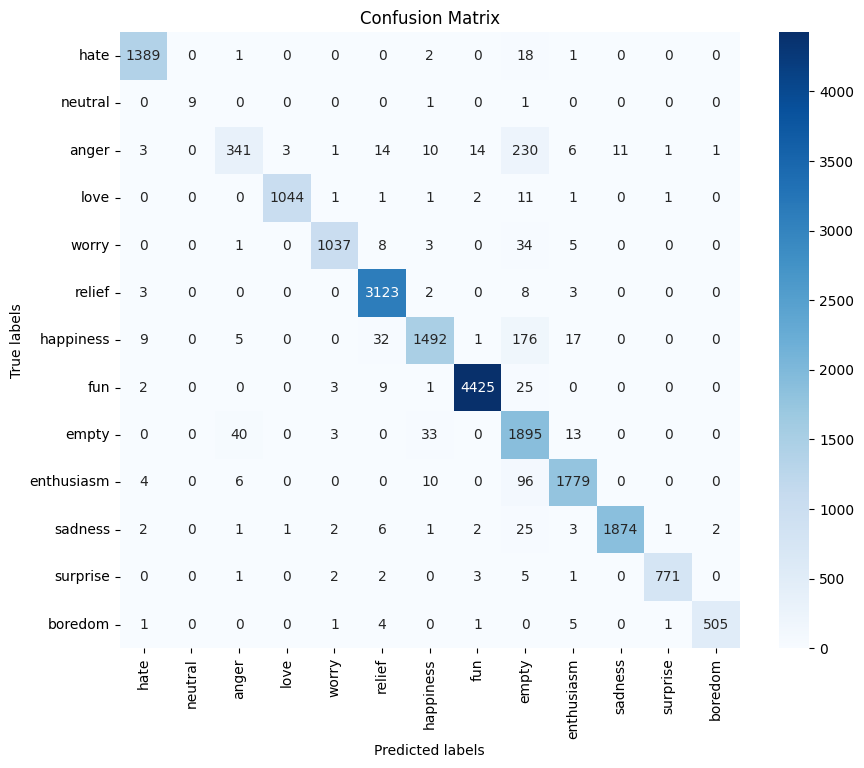

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostramos las métricas
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Calculamos y mostramos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Guardamos el modelo para poder utilizarlo

→ Haremos uso de la libreria joblib

In [52]:
import joblib
# Guardar el modelo a un archivo
joblib.dump(pipe_lr, 'emotions_model.joblib')

['emotions_model.joblib']

In [53]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


### Probamos el modelo guardado

In [54]:
model = joblib.load('emotions_model.joblib')

text = ['I love pizza so much i would eat it everyday']
prediction = model.predict(text)

print('Prediction: ', prediction)

Prediction:  ['love']
